In [3]:
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt

from glob import glob
import os
from PIL import Image

ModuleNotFoundError: No module named 'cv2'

In [3]:
root = './example_images'

In [4]:
img1 = np.array(Image.open((os.path.join(root, 'cute_dog.jpeg'))))
mask1 = np.array(Image.open(os.path.join(root, 'cute_dog_t.png')))
img2 = np.array(Image.open(os.path.join(root, 'happy_people.jpeg')))
mask2 = np.array(Image.open(os.path.join(root, 'happy_people_t.png')))

NameError: name 'np' is not defined

In [4]:
import cv2
import numpy as np
import random

class CopyPaste():
    
    def __init__(self, scale_jittering_range = (1, 1), random_padding= False, p=0.5):
        super().__init__()

        self.execute_prob = p
        self.scale_jittering_range = scale_jittering_range
    
    def _copypaste(self, image1, mask1, image2, mask2):

        if random.uniform(0, 1) < self.execute_prob:
            #input mask elements are in ground truth settings.. need to change index -> color
            cp_mask = np.where(mask1==0, mask1, 255)
            cp_mask_inv = cv2.bitwise_not(cp_mask)
            
            h, w= cp_mask.shape
            
            bitw_img1 = cv2.bitwise_and(image1, image1, mask=cp_mask)
            bitw_mask1 = cv2.bitwise_and(mask1, mask1, mask=cp_mask)

            image2, mask2 = self._random_scale_jitter(image1, mask1, image2, mask2)
            
            image2 = cv2.resize(image2, (w,h))
            mask2 = cv2.resize(mask2, (w,h))
            print(image2.shape)
            print(cp_mask_inv.shape)
            
            bitw_img2 = cv2.bitwise_and(image2, image2, mask=cp_mask_inv)
            bitw_mask2 = cv2.bitwise_and(mask2, mask2, mask=cp_mask_inv)
            
            result_img = cv2.add(bitw_img1, bitw_img2)
            result_mask = cv2.add(bitw_mask1, bitw_mask2)

            return result_img, result_mask
            
        else:
            return image1, mask1

    def _random_scale_jitter(self, image1, mask1, image2, mask2):

        #Scale range is determined by sigma value
        #The value can't go 5 times higher or lowe
        scale_num = 0
        
        while scale_num == 0:
            scale_num = random.randint(0,2)

        h, w, _ = image2.shape
        
        if scale_num > 0:
            
            o_height = h * scale_num 
            o_width = w * scale_num

            new_image2= np.full((o_height, o_width, 3), 125, dtype=np.uint8)
            new_image2[:h, :w, :] = image2

            new_mask2 = np.zeros((o_height, o_width), dtype=np.uint8)
            new_mask2[:h, :w] = mask2

        else:

            o_height = int(h * ((1/scale_num) * (-1)))
            o_width = int(w * ((1/scale_num) * (-1)))
            
            ran_start_point_y = random.randint(0, h-o_height)
            ran_start_point_x = random.randint(0, h-o_width)
            
            new_image2 = image2[ran_start_point_y: o_height, ran_start_point_x: o_width]
            new_mask2 = mask2[ran_start_point_y: o_height, ran_start_point_x: o_width]
        
        return new_image2, new_mask2
        
    def __call__(self, image1, mask1, image2, mask2):

        return self._copypaste(image1, mask1, image2, mask2)

In [5]:
transform = CopyPaste(p=1, scale_jittering_range = (-1,0))
result_img, result_mask = transform(img1, mask1, img2, mask2)

(801, 1200, 3)
(801, 1200)


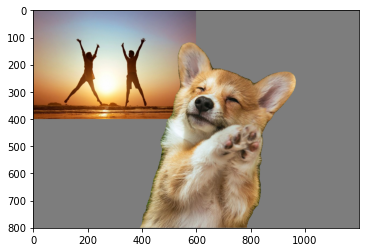

In [6]:
plt.imshow(result_img)

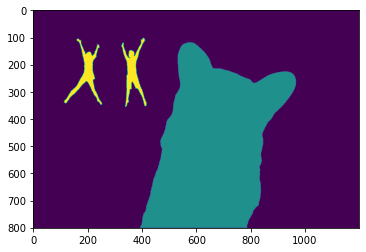

In [7]:
plt.imshow(result_mask)

In [8]:
transform = CopyPaste(p=1, scale_jittering_range = (-1,0))
result_img, result_mask = transform(img1, mask1, img2, mask2)

(801, 1200, 3)
(801, 1200)


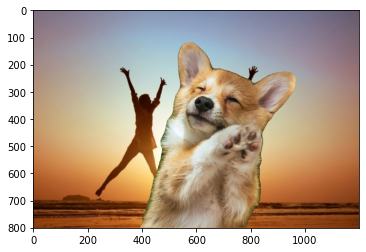

In [9]:
plt.imshow(result_img)

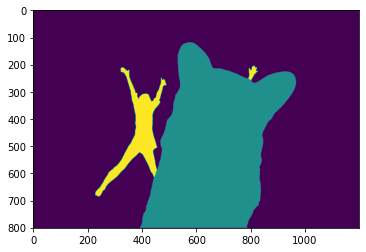

In [10]:
plt.imshow(result_mask)